<h1 align="center">Report</h1>

<h3  align="center">Devender goud</h3>

<h1 align ="center">PREDICTING ROAD ACCIDENT SEVERITY</h1>

##  Introduction To  Business Problem

### A.1. Background Description

<i>Traffic accidents result in severe fatalities across the world and are the leading cause of death for people aged 15-29. Weather patterns can have a dramatic impact on the safety of driving in specific regions, due to limited visibility and reduced grip from tyres.

When people start planning their trips between places they tend to check their route first and see estimated time to arrival, but often don’t see any warnings for weather or increased accident risks on certain roads. Due to this, drivers might end up taking a dangerous route and encounter treacherous road surfaces and end up in an accident.
<i>

#### According to Road Crash Statistics
 
Approximately 1.35 million people die in road crashes annually, on average 3,700 people lose their lives every day on the roads.

An additional 20–50 million suffer non-fatal injuries, often resulting in long-term disabilities.
        

### A.2 Problem 
The objective is to explore the dataset from https://www.gov.uk/government/collections/road-accidents-and-safety-statistics called road safety data
and determine what are the key factors that drive the outcome of an accident for the involved car(s)' passengers: light injuries, severe injuries, fatal outcome. Additionally, the outcomes of this analysis can be used as a prescriptive tool to :

(1) Have the appropriate medical emergency resources allocated for the times, locations and circumstances when accidents are most likely to occur, with a particular emphasis on the severe and life-threatening cases.

(2) Design prevention measures based on those accident factors identified as having the largest influence on accident outcomes.
### A.3 Interest 
By being able to allocate medical emergency resources more efficiently and by being able to reduce injuries and deaths through prevention campaigns, society as a whole will reduce the economic impact of road hazards. This analysis is therefore aimed at decision-makers of the uk govt, notably those in charge of Transportation and Medical Affairs. Beyond economic considerations, there is also a moral value in reducing the suffering and deaths of the thousands of people affected by road accidents.

# B.1 DATA SOURCE
Data was collected from the https://www.gov.uk/government/collections/road-accidents-and-safety-statistics called road safety data for the years 2005-2014
it consists of various 
Accident Circumstances
**Accident Index ** : index of accident
    
**Police Force **:      which police force had arrived at spot 
    
Accident Severity:
    
 code | label
  ---|---
1 | fatal
2 | serious
3 | slight
    
**Number of Vehicles**: number of vechicles involved in collision or accident
    
**Number of Casualties**: number of casulties involved
    
**Date (DD/MM/YYYY)**:date on which accident tookplace
    

                
    
**Location Easting OSGR (Null if not known):**  location
    
**Location Northing OSGR (Null if not known):** location
    
**Longitude (Null if not known):** longitude positon
    
**Latitude (Null if not known):** latitude 
    
Pedestrian Crossing-Human Control:
    
Pedestrian Crossing-Physical Facilities

    
Light Conditions :
   
value  | description
 ---|---
1 | Daylight
4 | Darkness - lights lit
5 |	Darkness - lights unlit
6 |Darkness - no lighting
7 |	Darkness - lighting unknown
    
**Weather Conditions:**
    
value | description
 ---|---
0 | Fine no high winds
1 | Raining no high winds
2 | Snowing no high winds
3 | Fine + high winds
4 | Raining + high winds
5 | Snowing + high winds
6 | Fog or mist
7 | Other
8 | Unknown
    
**Road Surface Conditions:**
    
code | label
---|---
1 |	Dry
2 |	Wet or damp
3 | Snow
4 | Frost or ice
5 |	Flood over 3cm. deep
6 | Oil or diesel
7 |	Mud
-1 |	Data missing or out of range

Special Conditions at Site:

code |	label
 ---|---
0	| None
1 | 	Auto traffic signal - out
2 | Auto signal part defective
3 | Road sign or marking defective or obscured
4 | Roadworks
5 |	Road surface defective
6 | Oil or diesel
7 |	Mud
-1 | Data missing or out of range

    
Carriageway Hazards  :

code |	label
---|---
0 |	None
1 | Vehicle load on road
2 | Other object on road
3 | Previous accident
4 | Dog on road
5 | Other animal on road
6 | Pedestrian in carriageway - not injured
7 | Any animal in carriageway (except ridden horse)
-1 | Data missing or out of range

**Urban or Rural Area**
    
code	|label
---|---
1	| Urban
2	| Rural
3	| Unallocated

**Did Police Officer Attend Scene of AccidenT :**

code | label
---|---
1	| Yes
2	| No
3	| No - accident was reported using a self completion  form (self rep only)



# Data preprocessing

As I extracted or downloaded dataset from uk.gov.in.road_safety_data . There were a
lot of missing values in some of attributes .we replaced them with **mean** and **mode** and finally cleaned our dataset

as I extracted or downloaded dataset from uk.gov.in.road_safety_data . There were a
lot of missing values in some of attributes .we replaced them with **mean** and **mode** and finally cleaned our dataset
### Feature Selection
after data cleaning  total of 31 columns  had only selected the attributes which normally effect the Accident such as weather_conditions,
road_surface_conditions,light_conditions and more excluding locations of accidents
 



Day_of_Week |Light_Cond |	Weather_Conditions|Road_Surface_Conditions|Carriageway_Hazards
---|---|---|---|---
0 |	2 |	4 |	1 |	1 |	0
1 |	2 |	4| 	1 |	1 |	0
2 |	2 |	4 |	1 |	1 |	0
3 |	2 |	4 |	2 |	2 |	0
4 |	2| 	4 |	1| 2 |	0


# Balancing
dataframe **Value_Counts** method for inorder to check whether our dataset is balanced or not
finally realised that our dataset contains more number of case 3(slight)and followed by Slight and dataset just contain only few values of fatal cases
It is necessary to balance our dataset inorder to avoid bias in result
used imblearn oversampling method in order to balance our dataset
 

converted our dataset nd array as sklearn library only takes array as input and also numerical values

## Normalising Data

**Data Standardization** give data zero mean and unit variance, it is good practice while dealing with classification algorithm


using sklearn preprocessing we transformed data 
so finally our data can be used for modelling

# Exploratory Data analysis

## Analysing btwn time and day of vs accident Severity

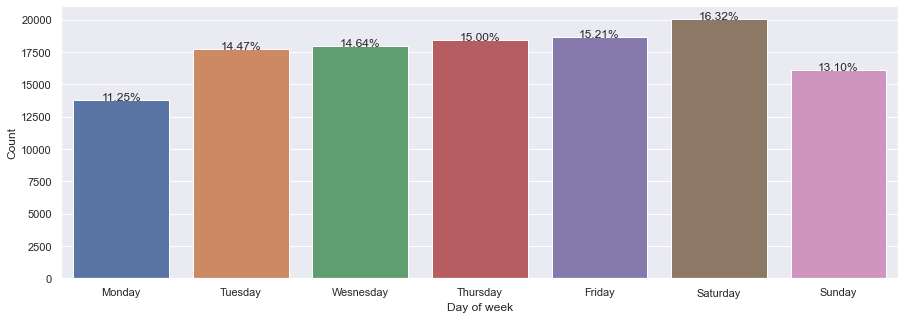

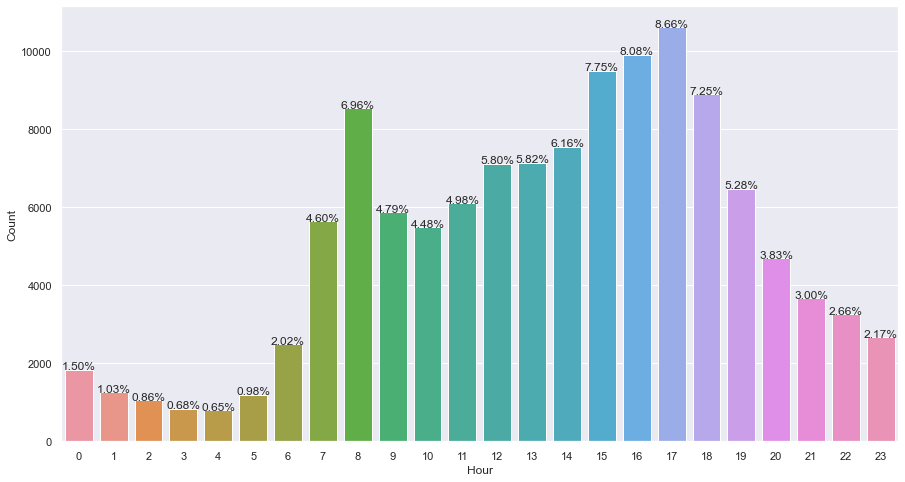

In [2]:
#@hidden cell
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df_accidents=pd.read_csv(r"C:\Users\deven\Downloads\RoadSafetyData_Accidents_2018.csv",low_memory=False)
acc_time = df_accidents[['Date','Day_of_Week','Time']]
acc_time.head()
acc_time.dropna(axis=0,inplace=True)
def year(string):
    return int(string[6:10])
acc_time['Year']=acc_time['Date'].apply(lambda x: year(x))
#creating month column
def month(string):
    return int(string[3:5])
acc_time['Month']=acc_time['Date'].apply(lambda x: month(x))
def day(string):
    return int(string[0:2])
acc_time['Day']=acc_time['Date'].apply(lambda x: day(x))
#creating hour column
def hour(string):
    s=string[0:2]
    return int(s)
acc_time['Hour']=acc_time['Time'].apply(lambda x: hour(x))
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
weekplot = sns.countplot(x='Day_of_Week',data=acc_time)
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Monday','Tuesday','Wesnesday','Thursday','Friday','Saturday','Sunday'])
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
Hourplot = sns.countplot(x='Hour',data=acc_time)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches: 
    height = p.get_height() 
    Hourplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()


# Modelling

**classification** is a supervised learning approach which can be
thought of as a means of categorizing or classifying some unknown items into a
discrete set of classes ,as our target variable of interest is Accident_Severity is also a discrete variable.

**train_test_split** splitting dataset into train and test sets so that it would give a good ``out of sample accuracy``


Train set: (56000, 5) (56000,)

Test set: (14000, 5) (14000,)

I applied Classification models(KNearestNeighbors,DecisionTree,SupportVector machines and logistic Regression) to the dataset
and used Jaccard_score and f1-score as the evaluation metrics


checking our k plotting differents k values

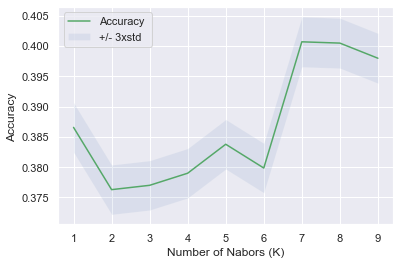

In [16]:
from IPython.display import Image
PATH=r"C:\Users\deven\Downloads\ml\bestk.png"
Image(filename = PATH, width=10000, height=10000)

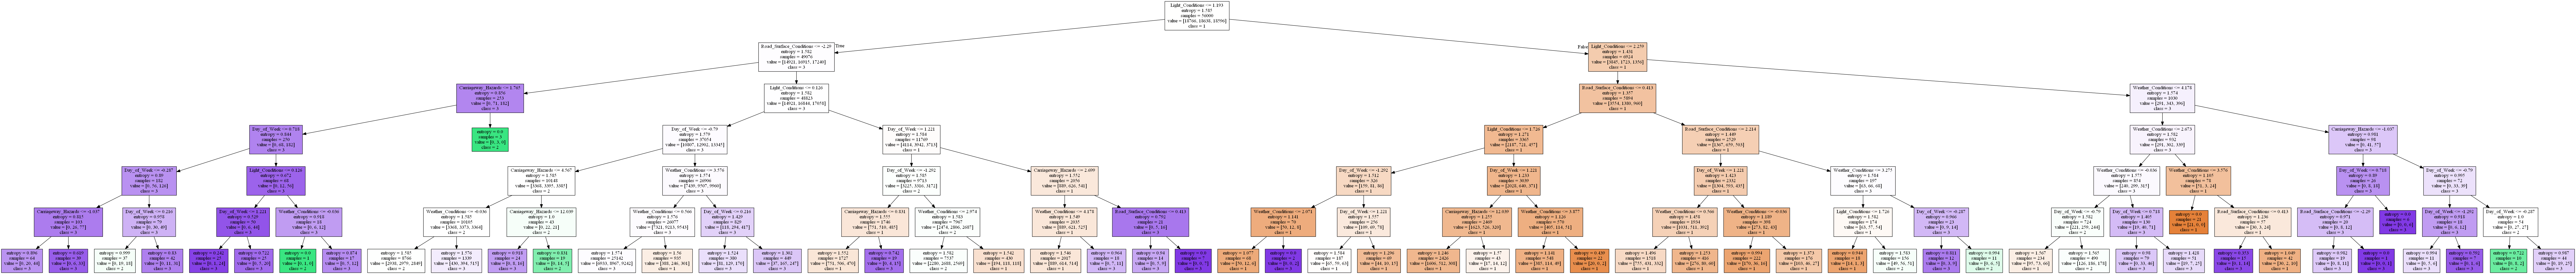

In [21]:
from IPython.display import Image
PATH=r"C:\Users\deven\Desktop\projects\Coursera_Capstone\decision_tree_graphivz.png"
Image(filename = PATH, width=100000, height=1000000)

The results all had the same
problems. The predicted values had much narrow range than the actual values (Figure 8), and as
a result, the prediction errors were larger as the actual values deviated further from zero. These results were not acceptable,because results  I had got low f1_score. 
Having larger errors on those predictions was obviously not desirable


# Model Evaluation

Algorithm |	Jaccard |	F1-score| 	LogLoss
---|---|---|---
KNN | 0.251751 	|0.402115 	|NA
SVM |	0.250214 |	0.399372 |	NA
DecisionTree 	|0.244702 	|0.391529 	|NA
Logistic Regression 	|0.210959 	|0.333193 |	1.08484

BY observing results of different algoritms we observe that our model is not good in predicting results .
Someone  never  trust the model which is having such a low accuracy 


# Results

# 4.2 Machine Learning modeling results

we used classificationalgorithm to model our data we can notice that our model performance is quite poor predicting accidentseverity.By observing our data which is imbalanced  inorder to balance our dataset we do require some knowledge in deeplearnings And from a conceptual standpoint, 
it appears normal that one cannot predict with a lot of precision the outcome of an accident with the
classifiers at hand. One would therefore recommend discarding this ML analysis and focusing on the
traditional results presented above

# 5. Discussion of the Results
At the end of this analysis, it appears clearly that not much can be done with simple Machine Learning
techniques with the dataset as provided by the UK govt. Indeed, the categorical classifiers
complexify the analysis a lot and one would need more advanced techniques (not taught in this course) to
be able to complete a more meaningful analysis. Conversely, one can also notice that quite a few insights
are already obtained from the traditional data analysis methods, and that there is limited interest in
exploring a dataset of that type with an ML approach.

 # 6. Conclusion
In conclusion, the reader will have taken note that key factors. of accidents in uk over the year
2018 have been as follows :
...The summer is a critical period.

...Accidents seem to overly take place in the morning at 8 and evenings, possibly when people come
go and  back from work.

...Accidents seem to be more fatal when  there high winds and raining

...Accidents seem to be more fatal when surface is wet or any animal on road

...Accidents seem to be more fatal when lightconditions are Daylight